# Team Members Visualization
This notebook's aim is to use the Lichess API to see the distribution of members. Hopefully that will offer insight into figuring out the best way to optimize the arenas.

## Imports

In [1]:
import pandas as pd
import requests
import json

## Constants

In [2]:
TEAM_ID = 'chess960'
ENDPOINT = f'https://lichess.org/api/team/{TEAM_ID}/users'

## Download into dataframe

Hit the endpoint

In [3]:
r = requests.get(ENDPOINT)

Deparse from Lichess

In [4]:
assert r.status_code == 200

strings = r.text.split('\n')
members = []
profiles = []
scores = []
for s in strings:
    try:
        member = json.loads(s)
    except:
        continue 

    if 'chess960' in member['perfs']:
        scores.append(member['perfs']['chess960'])
    if 'profile' in member:
        profiles.append(member['profile'])
        
    members.append(member)
print(f'Members: {len(members)} Profiles: {len(profiles)} ELOs: {len(scores)}')

Members: 1052 Profiles: 664 ELOs: 759


Convert to dataframe

In [5]:
members = pd.DataFrame(members)
members.to_csv('data/members.csv', index=False)
members

,id,username,online,perfs,createdAt,profile,seenAt,playTime,language,url,booster,title,patron,tosViolation,disabled
0,zalioth,Zalioth,False,"{'chess960': {'games': 11, 'rating': 1588, 'rd...",1609889612232,"{'country': 'ES', 'location': 'AlcalÃ¡ la Real...",1.615341e+12,"{'total': 55072, 'tv': 0}",es-ES,https://lichess.org/@/Zalioth,NaN,NaN,NaN,NaN,NaN
1,eugenious45,EuGenious45,False,"{'blitz': {'games': 353, 'rating': 1486, 'rd':...",1611159371260,{'country': 'MX'},1.615316e+12,"{'total': 211473, 'tv': 0}",es-ES,https://lichess.org/@/EuGenious45,NaN,NaN,NaN,NaN,NaN
2,jordantrodney,JordanTRodney,False,"{'blitz': {'games': 134, 'rating': 1207, 'rd':...",1599921975087,{'firstName': 'FsuJordan'},1.615254e+12,"{'total': 55870, 'tv': 0}",en-US,https://lichess.org/@/JordanTRodney,True,NaN,NaN,NaN,NaN
3,flakerocks,flakerocks,False,"{'blitz': {'games': 5183, 'rating': 1587, 'rd'...",1599677859998,NaN,1.615343e+12,"{'total': 1578636, 'tv': 0}",en-US,https://lichess.org/@/flakerocks,NaN,NaN,NaN,NaN,NaN
4,yomeromero,YOMEROMERO,False,"{'blitz': {'games': 39, 'rating': 1858, 'rd': ...",1614833939624,NaN,1.615358e+12,"{'total': 30404, 'tv': 0}",es-ES,https://lichess.org/@/YOMEROMERO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,chessbaz,Chessbaz,False,"{'blitz': {'games': 8, 'rating': 1616, 'rd': 2...",1356161632411,NaN,1.462984e+12,"{'total': 29549, 'tv': 0}",en,https://lichess.org/@/Chessbaz,NaN,NaN,NaN,NaN,NaN
1048,apsu2323,apsu2323,False,"{'chess960': {'games': 381, 'rating': 1857, 'r...",1310848148000,{'bio': 'I liek cheese :D'},NaN,"{'total': 1010987, 'tv': 0}",NaN,https://lichess.org/@/apsu2323,NaN,NaN,NaN,NaN,NaN
1049,jacob135135,Jacob135135,False,"{'chess960': {'games': 2672, 'rating': 1909, '...",1299966594000,"{'country': 'SK', 'firstName': 'Jakub', 'lastN...",1.615201e+12,"{'total': 3092689, 'tv': 120381}",en-US,https://lichess.org/@/Jacob135135,NaN,NaN,NaN,NaN,NaN
1050,yue,yue,False,"{'chess960': {'games': 788, 'rating': 1388, 'r...",1347382322859,{'country': 'DE'},1.615372e+12,"{'total': 1060212, 'tv': 1124}",en-US,https://lichess.org/@/yue,NaN,NaN,NaN,NaN,NaN


In [6]:
profiles = pd.DataFrame(profiles)
profiles.to_csv('data/profiles.csv', index=False)
profiles

,country,location,firstName,lastName,bio,fideRating,uscfRating,ecfRating,links
0,ES,AlcalÃ¡ la Real,JosÃ© Ignacio,Carmona Villegas,NaN,NaN,NaN,NaN,NaN
1,MX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,FsuJordan,NaN,NaN,NaN,NaN,NaN,NaN
3,LK,kagella,p.a.l.,udakara,i am in pinnawala school,600.0,NaN,NaN,NaN
4,CZ,Liberec,SxCapture,1.0,"Plays random moves, prefer captures. Supports ...",700.0,200.0,20.0,https://sx.rosada.cz/projects/sxcapture
...,...,...,...,...,...,...,...,...,...
659,BR,"Jales, SÃ£o Paulo",Thiago,Evangelista,Playing since april 2011. \r\nLeader of Brazil...,NaN,NaN,NaN,NaN
660,NaN,NaN,NaN,NaN,I liek cheese :D,NaN,NaN,NaN,NaN
661,SK,NaN,Jakub,B.,NaN,NaN,NaN,148.0,NaN
662,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
scores = pd.DataFrame(scores)
scores.to_csv('data/scores.csv', index=False)
scores

,games,rating,rd,prog,prov
0,11,1588,160,0,True
1,1,1419,382,0,True
2,3,1066,215,0,True
3,31,1328,78,-8,NaN
4,4275,1982,45,2,NaN
...,...,...,...,...,...
754,602,1812,135,22,True
755,381,1857,266,10,True
756,2672,1909,101,-21,NaN
757,788,1388,91,-35,NaN


## Exploratory Analysis

<AxesSubplot:>

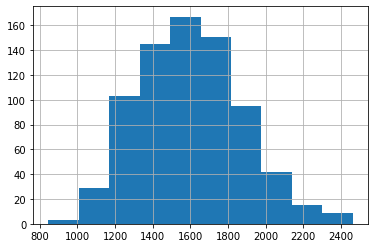

In [8]:
scores['rating'].hist()